In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os

path=os.path.join('gdrive','My Drive','annotated_images(shiv_vignesh)')
path

'gdrive/My Drive/annotated_images(shiv_vignesh)'

In [0]:
import pandas as pd
import numpy as np
import json

In [0]:

import json
import numpy as np

data=[]

json_file_name = path+"/EVA_Assignment_16(shiv_vignesh).json"

with open(json_file_name, "r") as read_file:
    data = json.load(read_file)
    
X = []

imgd = data['_via_img_metadata']#'img_001.jpg48539']['regions']

for _, imgval in imgd.items():
    for rgnd in imgval['regions']:
        shape = rgnd['shape_attributes']
        X.append([shape['width'], shape['height']])

X = np.reshape(X, (-1, 2))
X = X/400
lX = np.log(X)

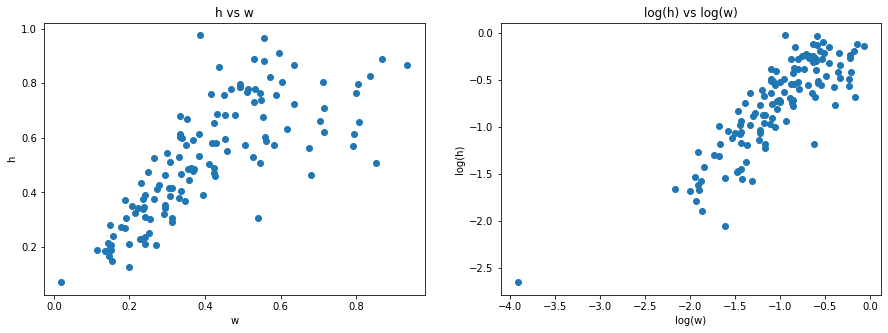

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(X[:, 0], X[:, 1], 'o')
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].plot(lX[:, 0], lX[:, 1], 'o')
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()


In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(X)
lkmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, tol=0.0001).fit(lX)

y_pred, ly_pred = kmeans.predict(X), lkmeans.predict(lX)



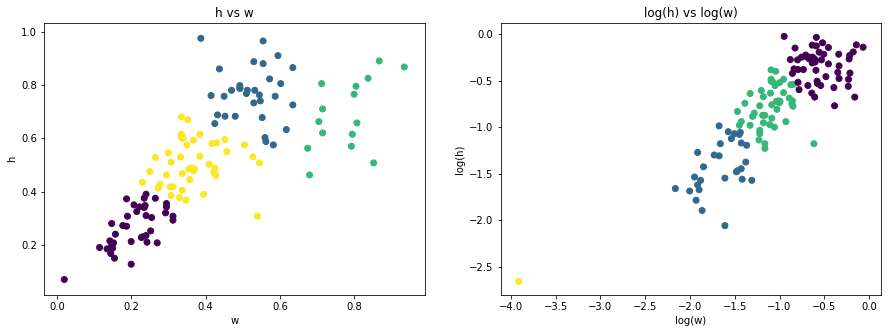

In [0]:
fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0].set_title('h vs w')
axs[0].set_ylabel('h')
axs[0].set_xlabel('w')

axs[1].scatter(lX[:, 0], lX[:, 1], c=ly_pred)
axs[1].set_title('log(h) vs log(w)')
axs[1].set_ylabel('log(h)')
axs[1].set_xlabel('log(w)')
plt.show()

In [0]:
kmeans.cluster_centers_*400

array([[ 83.5       , 106.21052632],
       [209.34375   , 305.84375   ],
       [311.86666667, 275.06666667],
       [146.60465116, 200.60465116]])

In [0]:
bb = np.exp(lkmeans.cluster_centers_)*400
print(bb)

[[232.19694188 284.41149434]
 [ 76.18402173  96.69061074]
 [132.86728807 183.38756331]
 [  8.          28.        ]]


In [0]:
import cv2
from os import listdir
from os.path import join
import matplotlib.patches as patches

def plot_image(imgd, bb):
    idx = np.random.randint(0, 99)
    key = list(imgd.keys())[idx]
    imgval = imgd[key]
    ps = join(file_name, imgval["filename"])
    img = cv2.imread(ps)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig = plt.gcf()
    fig.set_size_inches(12, 12)
    plt.imshow(img)
    ax = fig.get_axes()[0]
    for rgnd in imgval['regions']:
        shape = rgnd['shape_attributes']
        x, y, w, h = shape['x'], shape['y'], shape['width'], shape['height']
        rect = patches.Rectangle((x, y), w, h, linewidth=2,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        cx, cy = (x + w/2), (y + h/2)
        nbb = len(bb)
        c = ['g', 'b', 'm', 'c']
        for i in range(nbb):
            w, h = bb[i, 0], bb[i, 1]
            x, y = cx - w/2, cy - h/2
            rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor=c[i], facecolor='none')
            ax.add_patch(rect)
    plt.show()

In [0]:
a=np.array(a)